In [3]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder


In [4]:
train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_features.npy')
train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_labels.npy')
train_features = np.squeeze(train_features)
print("train_features.shape:",train_features.shape)
print("train_labels.shape", train_labels.shape)

test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_features.npy')
test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_labels.npy')
test_features = np.squeeze(test_features)
print("test_features.shape:",test_features.shape)
print("test_labels.shape", test_labels.shape)


train_features.shape: (24464, 84)
train_labels.shape (24464, 1)
test_features.shape: (6160, 84)
test_labels.shape (6160, 1)


In [10]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(train_features, train_labels)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
classifier.score(test_features,test_labels)

0.5668831168831169

In [7]:
#使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train_features)
pca_test = pca.fit_transform(test_features)
print("new_train.shape:", pca_train.shape)
print("new_test.shape:", pca_test.shape)

new_train.shape: (24464, 2)
new_test.shape: (6160, 2)


In [9]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(pca_train, train_labels)
classifier.score(pca_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5237012987012987

In [39]:
#使用tsne降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train_features)
tsne_test = tsne.fit_transform(test_features)

In [40]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(tsne_train, train_labels)
classifier.score(tsne_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5743649732620321

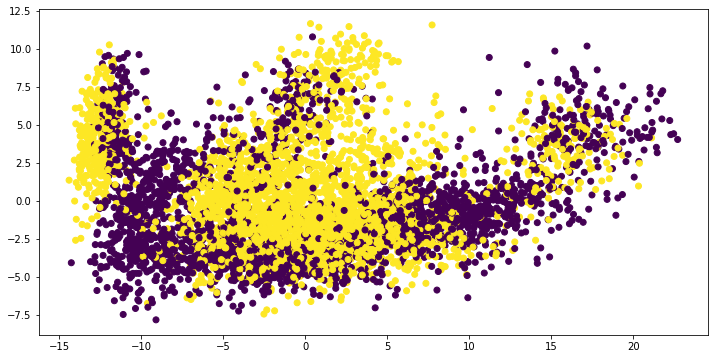

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=np.squeeze(test_labels))

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso           # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso(alpha=0.0009).fit(train_features, train_labels) 
model = SelectFromModel(lasso, prefit=True)

train_new = model.transform(train_features)
test_new = model.transform(test_features)

print("train_new.shape:", train_new.shape)
print("test_new.shape:", test_new.shape)

train_new.shape: (24640, 21)
test_new.shape: (5984, 21)


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.517822265625, tolerance: 0.6034287214279175
  positive)


In [55]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(train_new, train_labels)
classifier.score(test_new,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6505681818181818

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso           # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso(alpha=0.0006).fit(train_features, train_labels) 
model = SelectFromModel(lasso, prefit=True)

train_new = model.transform(train_features)
test_new = model.transform(test_features)

print("train_new.shape:", train_new.shape)
print("test_new.shape:", test_new.shape)

train_new.shape: (24640, 453)
test_new.shape: (5984, 453)


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454.658935546875, tolerance: 0.6034287214279175
  positive)


In [15]:
from sklearn import svm
classifier = svm.SVC(gamma=0.01)
classifier.fit(train_new, train_labels)
classifier.score(test_new,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5619986631016043

In [32]:
#使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_train = pca.fit_transform(train_features)
new_test = pca.fit_transform(test_features)
print("new_train.shape:", new_train.shape)
print("new_test.shape:", new_test.shape)

new_train.shape: (24640, 2)
new_test.shape: (5984, 2)


In [33]:
from sklearn import svm
classifier = svm.SVC(gamma=0.01)
classifier.fit(new_train, train_labels)
classifier.score(new_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5696858288770054

In [26]:
#使用tsne降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train_features)
tsne_test = tsne.fit_transform(test_features)
print("tsne_train.shape:", tsne_train.shape)
print("tsne_test.shape:", tsne_test.shape)

tsne_train.shape: (24640, 2)
tsne_test.shape: (5984, 2)


In [27]:
from sklearn import svm
classifier = svm.SVC(gamma=0.01)
classifier.fit(tsne_train, train_labels)
classifier.score(tsne_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5300802139037433

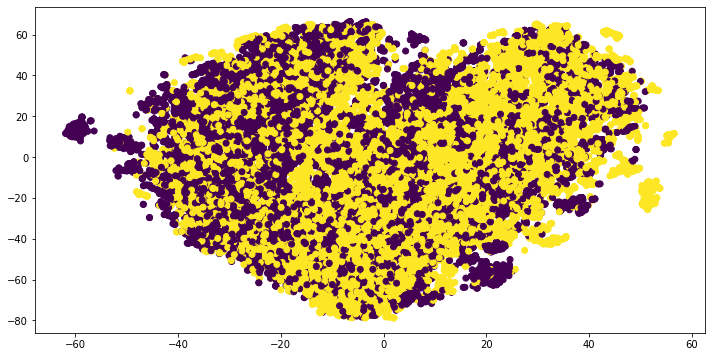

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(tsne_train[:, 0], tsne_train[:, 1], c=np.squeeze(train_labels))

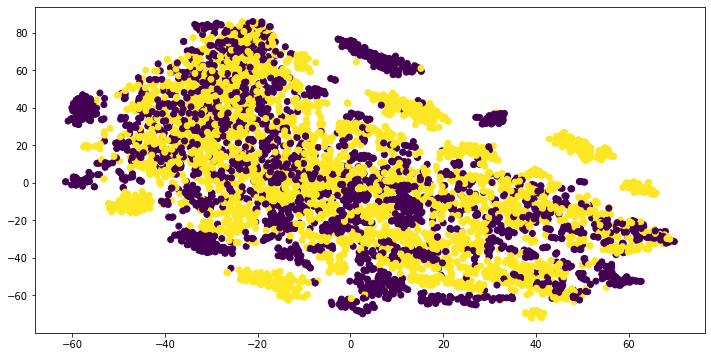

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(tsne_test[:, 0], tsne_test[:, 1], c=np.squeeze(test_labels))

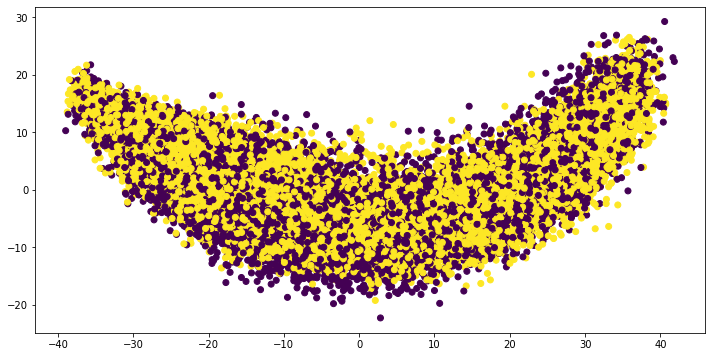

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(new_train[:, 0], new_train[:, 1], c=np.squeeze(train_labels))

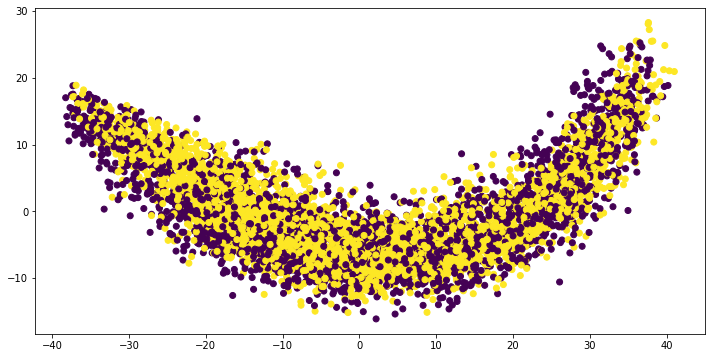

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(new_test[:, 0], new_test[:, 1], c=np.squeeze(test_labels))